# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
#pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
pd.set_option('mode.chained_assignment', None)

In [3]:
# RUN ONLY ONCE
# os.chdir is used to change the current directory to the specified path
os.chdir("../") # Sets path to the repo folder as it is one level above where this file exists!
path = os.getcwd()
print(path)

/Users/ankurbhardwaj/Desktop/SEEDS/CFFS_Label_2024_25


***
## Import Cleaned Datasets

In [4]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [5]:
Items.head()

,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-14182,CHEESE PARM*GRATED,2.0,bag,2.5,Kg,DAIRY
1,I-72089,CHICKEN BRST STRP CKD^,2.0,bag,2.0,Kg,"PACKAGED BEER, CIDER"
2,I-65802,CREAM WHIP*36% 946ML,16.0,each,946.0,ml,DAIRY
3,I-68787,FOCACCIA ORGANIC,1.0,SHEET,1.0,SHEET,BREAD
4,I-3632,GARLIC POWDER*,2.1,Kg,2100.0,g,SPICES


In [6]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [7]:
Ingredients

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-3642,500.00,g,1.000000,333.3333,P-18907
1,I-6026,1.00,Kg,1000.000000,0.6667,P-18907
2,I-3388,250.00,ml,0.001000,27.7778,P-26216
3,I-3416,4.54,Kg,2.204620,0.5044,P-26216
4,I-5983,20.00,L,1.000000,2.2222,P-26216
5,I-6026,10.00,g,1.000000,1.1111,P-26216
6,I-4772,1.00,BUNCH,1.000000,0.0222,P-44728
7,I-14182,400.00,g,0.001000,88.8889,P-74628
8,I-3632,15.00,g,1.000000,3.3333,P-74628
9,I-3642,9.00,g,1.000000,2.0000,P-74628


In [8]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-3642,500.00,g,1.00000,333.3333,P-18907
1,I-6026,1.00,Kg,1000.00000,0.6667,P-18907
2,I-3388,250.00,ml,0.00100,27.7778,P-26216
3,I-3416,4.54,Kg,2.20462,0.5044,P-26216
4,I-5983,20.00,L,1.00000,2.2222,P-26216


In [9]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [10]:
Preps.head()
Preps.shape

(10, 7)

In [11]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [12]:
Products.head()

,ProdId,Description,SalesGroup
0,R-75442,ADDON|Chicken,ADD ONS
1,R-75441,ADDON|Meat Balls,ADD ONS
2,R-75444,ADDON|Prawns,ADD ONS
3,R-75446,ADDON|Roasted Veg,ADD ONS
4,R-75440,ENTREE|Pasta Bowl,FOOD


In [13]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Conversions_Added.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [14]:
Conversions

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,I-67659,0.008818,1.00,each,113.398,g
1,I-28697,0.005181,1.00,ea,193.000,g
2,I-47441,0.005181,1.00,ea,193.000,g
3,I-1905,0.012500,1.00,CT,80.000,g
4,I-47440,0.005051,1.00,ea,198.000,g
...,...,...,...,...,...,...
1137,I-72015,0.002205,0.25,ea,113.400,g
1138,I-61314,0.002000,0.30,pak,150.000,g
1139,I-72016,0.002597,0.20,ea,77.000,g
1140,I-4677,0.001102,0.10,CT,90.720,g


In [15]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                float64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Food Category_y                                            object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [16]:
mapping

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-57545,1.0,CHUCK FLAT BONELESS FZN,3.30,Kg,1.00,Kg,MEAT,beef & buffalo meat,41.346300,329.5,0.126450,1677.200,61309.00
1,I-10869,1.0,BEEF STIRFRY COV FR,5.00,Kg,1.00,Kg,MEAT,beef & buffalo meat,41.346300,329.5,0.126450,1677.200,61309.00
2,I-7064,1.0,BEEF OUTSIDE FLAT AAA,1.00,Kg,1.00,Kg,MEAT,beef & buffalo meat,41.346300,329.5,0.126450,1677.200,61309.00
3,I-37005,1.0,BEEF MEATBALLS,4.54,Kg,1000.00,g,MEAT,beef & buffalo meat,41.346300,329.5,0.126450,1677.200,61309.00
4,I-37002,1.0,BEEF INSIDE ROUND SHAVED,9.00,Kg,1000.00,g,MEAT,beef & buffalo meat,41.346300,329.5,0.126450,1677.200,61309.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,I-72089,4.0,CHICKEN BRST STRP CKD^,2.00,bag,2.00,Kg,"PACKAGED BEER, CIDER","poultry (chicken, turkey)",4.399600,116.8,0.011510,370.300,333.50
3074,I-68787,24.0,FOCACCIA ORGANIC,1.00,SHEET,1.00,SHEET,BREAD,"wheat/rye (bread, pasta, baked goods)",1.522500,14.8,0.004890,419.200,12821.70
3075,I-72822,24.0,PASTA SPAGHETTI*10 IN,2.00,bag,4.54,Kg,FOOD - GROCERY,"wheat/rye (bread, pasta, baked goods)",1.522500,14.8,0.004890,419.200,12821.70
3076,I-5093,13.0,PRAWN PD T/OF 31/35 BLK 5LB OW,1.00,lb,1.00,lb,SEAFOOD,crustaceans (shrimp/prawns),21.127400,70.3,0.002970,1207.800,48737.60


In [17]:
# Check if there are any duplicates in the mapping dataframe, "ItemId" column? False is good.
check = mapping["ItemId"].duplicated().any()
check

np.False_

In [18]:
mapping.loc[mapping["ItemId"] == 'I-62863']

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
1988,I-62863,59.0,CK|G&G|HMR|Meat Ball & Pasta.,1.0,ea,1.0,ea,PRODUCTION FOOD,manually adjusted,0.0,0.0,0.0,0.0,0.0


### Unit Converter

In [19]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [20]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-35132,MARINATED|Lemon & Herb Chx,185.0,ea,PREP,24050.0,g
1,P-26234,BATCH|Roasted Garlic Bread,16.0,ea,PREP,1280.0,g
2,P-26170,GRILLED|NaanBread,1.0,ea,PREP,125.0,g
3,P-16305,YIELD|Smokie (1pc),1.0,ea,NaN,112.0,g
4,P-26047,BOILED|Hard Boiled Eggs FT,50.0,ea,PREP,2500.0,g


In [21]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
521,P-26631,0.005818,24.0,ea,4125.000000,g
522,P-55093,0.002066,200.0,CT,96800.000066,g
523,P-50511,0.007407,1.0,ea,135.000000,g
524,P-51992,0.055385,36.0,slice,650.000000,g
525,P-7523,0.025806,12.0,ea,465.000000,g


In [22]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
1660,P-28369,0.028571,10.0,ea,350.0,g
1661,P-51992,0.026016,16.0,slice,615.0,g
1662,P-53056,0.010509,13.0,PTN,1237.0,g
1663,P-26631,0.005818,24.0,ea,4125.0,g
1666,P-51992,0.055385,36.0,slice,650.0,g


In [23]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [24]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier'].iloc[0]
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [25]:
# Test the std_converter
std_converter(0.25,'lb')

(113.398, 'g')

In [26]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'].isin(['ml','g']))]
        conversion.drop_duplicates(subset=['ConversionId'], inplace = True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            #print(conversion)
            Qty = float(qty)/float(multiplier.iloc[0])
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [27]:
spc_cov

['I-67659',
 'I-28697',
 'I-47441',
 'I-1905',
 'I-47440',
 'I-13327',
 'I-54484',
 'I-2501',
 'I-52609',
 'I-52636',
 'I-2772',
 'I-20347',
 'I-54756',
 'I-41251',
 'I-2833',
 'I-54761',
 'I-54755',
 'I-54759',
 'I-63749',
 'I-54758',
 'I-53847',
 'I-34313',
 'I-19639',
 'I-63683',
 'I-19700',
 'I-3902',
 'I-63690',
 'I-48660',
 'I-2546',
 'I-1727',
 'I-2118',
 'I-2778',
 'I-63698',
 'I-2116',
 'I-2120',
 'I-32271',
 'I-38717',
 'I-31549',
 'I-53226',
 'I-32265',
 'I-41807',
 'I-41805',
 'I-63977',
 'I-43988',
 'I-42899',
 'I-13970',
 'I-54757',
 'I-51331',
 'I-38957',
 'I-41804',
 'I-41800',
 'I-55664',
 'I-41803',
 'I-54483',
 'I-54482',
 'I-42194',
 'I-42203',
 'I-42202',
 'I-42201',
 'I-42200',
 'I-42197',
 'I-42204',
 'I-40471',
 'I-40472',
 'I-40473',
 'I-40474',
 'I-42196',
 'I-42199',
 'I-42198',
 'I-53014',
 'I-42210',
 'I-2768',
 'I-20879',
 'I-28641',
 'I-47441',
 'I-47440',
 'I-2501',
 'I-13327',
 'I-49783',
 'I-47430',
 'I-28685',
 'I-19910',
 'I-45537',
 'I-41375',
 'I-2

In [28]:
# Test the spc_converter
spc_converter('I-1120', 1, 'CT')

(1, 'CT')

In [29]:
spc_converter('P-35132', 1, 'ea')

(130.0, 'g')

## GHG Factors Calculation for Preps

In [30]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0.0
Preps['GHG Emission(g)/StdUom'] = 0.0
Preps['N lost (g)'] = 0.0
Preps['N lost (g)/StdUom'] = 0.0
Preps['Freshwater Withdrawals (ml)'] = 0.0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0.0
Preps['Stress-Weighted Water Use (ml)'] = 0.0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0.0
Preps['Land Use (m^2)'] = 0.0
Preps['Land Use (m^2)/StdUom'] = 0.0

In [31]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-3642,500.00,g,1.00000,333.3333,P-18907
1,I-6026,1.00,Kg,1000.00000,0.6667,P-18907
2,I-3388,250.00,ml,0.00100,27.7778,P-26216
3,I-3416,4.54,Kg,2.20462,0.5044,P-26216
4,I-5983,20.00,L,1.00000,2.2222,P-26216


In [32]:
Preps.loc[Preps["PrepId"] == "P-67984"]

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom


In [33]:
Preps

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-75391,COOKED|Pasta|Cavatappi,9.0,Kg,PREP,9000.0,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,P-26216,COOKED|Pasta|Penne|WW*,9.0,Kg,PREP,9000.0,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,P-75390,COOKED|Pasta|Spaghetti,9.0,Kg,PREP,9000.0,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,P-75443,COOKED|Prawns,800.0,g,NaN,800.0,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,P-18907,MIX|Salt & Pepper*,1.5,Kg,NaN,1500.0,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,P-75445,ROASTED|Veg,3.0,Kg,NaN,3000.0,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,P-74628,SAUCE|Alfredo,4.5,L,NaN,4500.0,ml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,P-75383,SAUCE|Marinara,4.5,L,NaN,4500.0,ml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,P-75559,SAUCE|Rose,4.0,L,NaN,4000.0,ml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,P-44728,YEILD|Chopped Parsley*,45.0,g,NaN,45.0,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]
    #print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        mapping_ingres = mapping.loc[mapping['ItemId'] == ingre]
        if ((ingre.startswith('I')) and 
            # The below condition excludes "vinegar" and "sauces and pastes" from the calculation
            # as we dont have their respective emissions factors
            # "vinegar" has value for GHG emissions but not for nitro, water, stress-water and land use
            (int(mapping_ingres["CategoryID"].iloc[0]) not in [57,58])):
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)'].iloc[0]
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product'].iloc[0]
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)'].iloc[0]
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)'].iloc[0]
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"].iloc[0]
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            #print(ghg, nitro, water, str_water)
            # print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [35]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

In [36]:
mapping.loc[mapping["ItemId"] == "I-5012"]

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
720,I-5012,31.0,PEACH SLCD GRADE A IQF,2.0,bag,2.5,Kg,PRODUCE,other fruits,0.4306,2.7,0.00071,3.5,4.7


In [37]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom'].iloc[0]
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom'].iloc[0]
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom'].iloc[0]
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom'].iloc[0]
            
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom'].iloc[0]
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, Qty, Uom, qty, qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [38]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([1923518. , 1207940. ,   12450. ,  165997. ,  638357.6,  308748.4,
             0. ,    8130. ])

In [39]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # Added this print statement July 31
    # print('Index:', index, '\nIngres:\n', ingres)
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, ghge, Qty, Uom, qty, weight)
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [40]:
for index, row in Preps.iterrows():
    link_preps(index, row)

In [41]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

In [42]:
Preps

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-75391,COOKED|Pasta|Cavatappi,9.0,Kg,PREP,9000.0,g,7726.575000,0.858508,67.242000,0.007471,1923518.0,213.724222,5.823392e+07,6470.435333,26.158100,0.002906
1,P-26216,COOKED|Pasta|Penne|WW*,9.0,Kg,PREP,9000.0,g,7726.575000,0.858508,67.242000,0.007471,1923518.0,213.724222,5.823392e+07,6470.435333,26.158100,0.002906
2,P-75390,COOKED|Pasta|Spaghetti,9.0,Kg,PREP,9000.0,g,7726.575000,0.858508,67.242000,0.007471,1923518.0,213.724222,5.823392e+07,6470.435333,26.158100,0.002906
3,P-75443,COOKED|Prawns,800.0,g,NaN,800.0,g,21553.913000,26.942391,70.387500,0.087984,1208189.0,1510.236250,4.874116e+07,60926.453750,4.863000,0.006079
4,P-18907,MIX|Salt & Pepper*,1.5,Kg,NaN,1500.0,g,5125.150000,3.416767,3.375000,0.002250,12450.0,8.300000,1.101500e+05,73.433333,15.500000,0.010333
5,P-75445,ROASTED|Veg,3.0,Kg,NaN,3000.0,g,2944.272333,0.981424,22.815000,0.007605,166412.0,55.470667,6.696481e+06,2232.160222,8.244167,0.002748
6,P-74628,SAUCE|Alfredo,4.5,L,NaN,4500.0,ml,38480.247200,8.551166,261.042000,0.058009,638357.6,141.857244,2.385053e+08,53001.180267,8.866488,0.001970
7,P-75383,SAUCE|Marinara,4.5,L,NaN,4500.0,ml,3732.749800,0.829500,31.758000,0.007057,308748.4,68.610756,1.792972e+07,3984.383289,5.093500,0.001132
8,P-75559,SAUCE|Rose,4.0,L,NaN,4000.0,ml,18761.332000,4.690333,130.133333,0.032533,420936.0,105.234000,1.139711e+08,28492.781778,6.204439,0.001551
9,P-44728,YEILD|Chopped Parsley*,45.0,g,NaN,45.0,g,50.290000,1.117556,0.790000,0.017556,8130.0,180.666667,2.939500e+05,6532.222222,0.119000,0.002644


In [43]:
Ingredients.loc[Ingredients["IngredientId"] == "P-50509"]

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe


In [44]:
Preps["GHG Emission (g)"].unique()

array([ 7726.575     ,  7726.575     , 21553.913     ,  5125.15      ,
        2944.27233333, 38480.2472    ,  3732.7498    , 18761.332     ,
          50.29      ])

In [45]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [46]:
Products['Weight (g)'] = 0.0
Products['GHG Emission (g)'] = 0.0
Products['N lost (g)'] = 0.0
Products['Freshwater Withdrawals (ml)'] = 0.0
Products['Stress-Weighted Water Use (ml)'] = 0.0

# most recently added
Products['Land Use (m^2)'] = 0.0

In [47]:
Items["ItemId"].unique()

array(['I-14182', 'I-72089', 'I-65802', 'I-68787', 'I-3632', 'I-4772',
       'I-37005', 'I-3387', 'I-3388', 'I-4757', 'I-3416', 'I-3420',
       'I-72822', 'I-3642', 'I-4791', 'I-5093', 'I-6026', 'I-68186',
       'I-3525', 'I-74878', 'I-16168', 'I-3579', 'I-17159', 'I-3692',
       'I-5983', 'I-4958', 'I-10491'], dtype=object)

In [48]:
Products.head()

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-75442,ADDON|Chicken,ADD ONS,0.0,0.0,0.0,0.0,0.0,0.0
1,R-75441,ADDON|Meat Balls,ADD ONS,0.0,0.0,0.0,0.0,0.0,0.0
2,R-75444,ADDON|Prawns,ADD ONS,0.0,0.0,0.0,0.0,0.0,0.0
3,R-75446,ADDON|Roasted Veg,ADD ONS,0.0,0.0,0.0,0.0,0.0,0.0
4,R-75440,ENTREE|Pasta Bowl,FOOD,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for ingredients that are items only
def get_items_ghge(index, row):
    # Represents the ingredients that have been used in the product corresponding to the index
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]

    # Emission values for the product corresponding to the index
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    land = Products.loc[index, "Land Use (m^2)"]

    """
    Sanity Check Statment: Whenver you need to check what value is assigned for a specific item in a product
    uncomment the following
    """
    # if Products.loc[index, 'ProdId'] == "R-56613":
    #     print(ingres)
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        
        if ingre.startswith('I'):
            # Check if the ingredient is present in the mapping
            mapping_ingre = mapping.loc[mapping['ItemId'] == ingre]
            if ((not mapping_ingre.empty) and 
                # The below condition excludes "vinegar" and "sauces and pastes" from the calculation
                # as we dont have their respective emissions factors
                # "vinegar" has value for GHG emissions but not for nitro, water, stress-water and land use
                (int(mapping_ingre["CategoryID"].iloc[0]) not in [57,58])):
                ghge = mapping_ingre['Active Total Supply Chain Emissions (kg CO2 / kg food)'].iloc[0]
                nitro_fac = mapping_ingre['g N lost/kg product'].iloc[0]
                water_fac = mapping_ingre['Freshwater Withdrawals (L/FU)'].iloc[0]
                str_water_fac = mapping_ingre['Stress-Weighted Water Use (L/FU)'].iloc[0]
                land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]

                Qty = float(ingres.loc[idx, 'Qty'])
                Uom = ingres.loc[idx, 'Uom']
                if ingre in Conversions['ConversionId'].tolist():
                    qty = spc_converter(ingre, Qty, Uom)[0]
                else:
                    qty = std_converter(Qty, Uom)[0]

                weight += qty
                ghg += qty * float(ghge)
                nitro += qty * float(nitro_fac) / 1000
                water += qty * float(water_fac)
                str_water += qty * float(str_water_fac)
                land += qty * float(land_fac)

    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [50]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom'].iloc[0]
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom'].iloc[0]
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom'].iloc[0]
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom'].iloc[0]
            land_fac = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"].iloc[0]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
                
            # print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [51]:
Ingredients

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-3642,500.00,g,1.000000,333.3333,P-18907
1,I-6026,1.00,Kg,1000.000000,0.6667,P-18907
2,I-3388,250.00,ml,0.001000,27.7778,P-26216
3,I-3416,4.54,Kg,2.204620,0.5044,P-26216
4,I-5983,20.00,L,1.000000,2.2222,P-26216
5,I-6026,10.00,g,1.000000,1.1111,P-26216
6,I-4772,1.00,BUNCH,1.000000,0.0222,P-44728
7,I-14182,400.00,g,0.001000,88.8889,P-74628
8,I-3632,15.00,g,1.000000,3.3333,P-74628
9,I-3642,9.00,g,1.000000,2.0000,P-74628


In [52]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-75442,ADDON|Chicken,ADD ONS,0.0,0.0,0.0,0.0,0.0,0.0
1,R-75441,ADDON|Meat Balls,ADD ONS,0.0,0.0,0.0,0.0,0.0,0.0
2,R-75444,ADDON|Prawns,ADD ONS,0.0,0.0,0.0,0.0,0.0,0.0
3,R-75446,ADDON|Roasted Veg,ADD ONS,0.0,0.0,0.0,0.0,0.0,0.0
4,R-75440,ENTREE|Pasta Bowl,FOOD,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
print(Products.columns)

Index(['ProdId', 'Description', 'SalesGroup', 'Weight (g)', 'GHG Emission (g)',
       'N lost (g)', 'Freshwater Withdrawals (ml)',
       'Stress-Weighted Water Use (ml)', 'Land Use (m^2)'],
      dtype='object')


In [54]:
Products["ProdId"].unique()

array(['R-75442', 'R-75441', 'R-75444', 'R-75446', 'R-75440'],
      dtype=object)

In [55]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
# UPDATED get_products_ghge FUNCTION to prevent error:

def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('R'):
            mapping_ingre = Products.loc[Products['ProdId'] == ingre]
            if not mapping_ingre.empty:
                ghge = mapping_ingre['GHG Emission (g)'].iloc[0]
                nitro_fac = mapping_ingre['N lost (g)'].iloc[0]
                water_fac = mapping_ingre['Freshwater Withdrawals (ml)'].iloc[0]
                str_water_fac = mapping_ingre['Stress-Weighted Water Use (ml)'].iloc[0]
                
                # most recently added
                land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]
                
                Weight = mapping_ingre['Weight (g)'].iloc[0]
                Qty = float(ingres.loc[idx, 'Qty'])
                ghg += Qty * float(ghge)
                nitro += Qty * float(nitro_fac)
                water += Qty * float(water_fac)
                str_water += Qty * float(str_water_fac)
                weight += Qty * float(Weight)
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [56]:
for index, row in Products.iterrows():
    get_items_ghge(index, row)

In [57]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

In [58]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

In [59]:
# Filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom


In [60]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [61]:
for index, row in Products.iterrows():
    filter_products(index, row)

In [62]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-75442,ADDON|Chicken,ADD ONS,90.0,395.964000,10.512000,33327.000000,3.001500e+04,1.035900
1,R-75441,ADDON|Meat Balls,ADD ONS,90.0,3721.167000,29.655000,150948.000000,5.517810e+06,11.380500
2,R-75444,ADDON|Prawns,ADD ONS,60.0,1616.543475,5.279062,90614.175000,3.655587e+06,0.364725
3,R-75446,ADDON|Roasted Veg,ADD ONS,90.0,88.328170,0.684450,4992.360000,2.008944e+05,0.247325
4,R-75440,ENTREE|Pasta Bowl,FOOD,549.0,2486.754051,19.582831,162775.166667,1.018071e+07,5.179118


There will be some productsn on the menu that are Preps and some that are items. All of that is handled in the cells below. You should note all the menu products that are preps and items so you can add them here.

In [63]:
#Preps that are also products
# preps_Products = ["P-26123", "P-71572"] # OK
# preps_Products = ['P-73607', 'P-73203', 'P-73341'] # Gather
# preps_Products = ["P-57233"] # Feast
# preps_Products = [] # PHO REAL
# preps_Products = ['P-25426', 'P-73972', 'P-74038', 'P-74043', 'P-73976', 'P-74042', 'P-74041', 'P-73974', 'P-73973', 'P-73978',
#                     'P-73969','P-74040','P-73971','P-74039','P-73977','P-74037', 'P-73970' ] #HARVEST FESTIVAL
# preps_Products = ["P-35417", "P-48915"] # PERUGIA
preps_Products = ['P-75391', 'P-26216', 'P-75390', 'P-74628', 'P-75383', 'P-75559'] # PRESTO
#Items that are also products
# items_Products = [] #OK
# items_Products = ['I-74639', 'I-74636', 'I-74638', 'I-74637'] #Gather
# items_Products = ["I-57554", "I-1033"] #Feast
# items_Products = [] # PERUGIA
# items_Products = [] # PHO REAL
items_Products = ['I-74878'] # PRESTO
Preps_Products = Preps.loc[Preps["PrepId"].isin(preps_Products)]
Items_Products = mapping.loc[mapping["ItemId"].isin(items_Products)]
display(Preps_Products)
display(Items_Products.head(5))
try:
    assert Preps_Products.shape[0] + Items_Products.shape[0] == len(preps_Products) + len(items_Products)
except AssertionError:
    if Preps_Products.shape[0] != len(preps_Products):
        print(set(preps_Products) - set(Preps_Products["PrepId"]))
    if Items_Products.shape[0] != len(items_Products):
        print(set(items_Products) - set(Items_Products["ItemId"]))

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-75391,COOKED|Pasta|Cavatappi,9.0,Kg,PREP,9000.0,g,7726.5750,0.858508,67.242000,0.007471,1923518.0,213.724222,5.823392e+07,6470.435333,26.158100,0.002906
1,P-26216,COOKED|Pasta|Penne|WW*,9.0,Kg,PREP,9000.0,g,7726.5750,0.858508,67.242000,0.007471,1923518.0,213.724222,5.823392e+07,6470.435333,26.158100,0.002906
2,P-75390,COOKED|Pasta|Spaghetti,9.0,Kg,PREP,9000.0,g,7726.5750,0.858508,67.242000,0.007471,1923518.0,213.724222,5.823392e+07,6470.435333,26.158100,0.002906
6,P-74628,SAUCE|Alfredo,4.5,L,NaN,4500.0,ml,38480.2472,8.551166,261.042000,0.058009,638357.6,141.857244,2.385053e+08,53001.180267,8.866488,0.001970
7,P-75383,SAUCE|Marinara,4.5,L,NaN,4500.0,ml,3732.7498,0.829500,31.758000,0.007057,308748.4,68.610756,1.792972e+07,3984.383289,5.093500,0.001132
8,P-75559,SAUCE|Rose,4.0,L,NaN,4000.0,ml,18761.3320,4.690333,130.133333,0.032533,420936.0,105.234000,1.139711e+08,28492.781778,6.204439,0.001551


,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
3077,I-74878,59.0,SAUCE MEAT*ROMAN,4.0,bag,2.0,Kg,FOOD - GROCERY,manually adjusted,20.972175,168.7,0.063562,878.175,32509.55


In [64]:
Preps_Products.drop(columns=["PakQty", "PakUOM", "StdUom", "GHG Emission(g)/StdUom", 
                             "N lost (g)/StdUom", "Freshwater Withdrawals (ml)/StdUom", 
                             "Stress-Weighted Water Use (ml)/StdUom", "Land Use (m^2)/StdUom"], 
                    inplace=True)

# Rename columns in Preps_Products
Preps_Products.rename(columns={"StdQty": "Weight (g)", "PrepId": "ProdId", 
                               "InventoryGroup": "SalesGroup"}, inplace=True)

# Initialize "Weight (g)" column with 0 in Items_Products
Items_Products["Weight (g)"] = 0

# Assign specific weights based on "ItemId"
# ##MANUAL
# Items_Products.loc[Items_Products["ItemId"] == "I-74639", "Weight (g)"] = 100
# Items_Products.loc[Items_Products["ItemId"] == "I-74636", "Weight (g)"] = 100
# Items_Products.loc[Items_Products["ItemId"] == "I-74638", "Weight (g)"] = 100
Items_Products.loc[Items_Products["ItemId"] == "I-74878", "Weight (g)"] = 2000



# print(Preps_Products.head(10))

Preps_Products.loc[Preps_Products["ProdId"] == "P-75391", "Weight (g)"] = 9000.0
Preps_Products.loc[Preps_Products["ProdId"] == "P-26216", "Weight (g)"] = 9000.0
Preps_Products.loc[Preps_Products["ProdId"] == "P-75390", "Weight (g)"] = 9000.0
Preps_Products.loc[Preps_Products["ProdId"] == "P-74628", "Weight (g)"] = 4500.0
Preps_Products.loc[Preps_Products["ProdId"] == "P-75383", "Weight (g)"] = 4500.0
Preps_Products.loc[Preps_Products["ProdId"] == "P-75559", "Weight (g)"] = 4000.0


for index,row in Items_Products.iterrows():
    Items_Products.loc[index, "Active Total Supply Chain Emissions (kg CO2 / kg food)"] = Items_Products.loc[index, "Active Total Supply Chain Emissions (kg CO2 / kg food)"] * Items_Products.loc[index, "Weight (g)"] / 1000
    Items_Products.loc[index, "g N lost/kg product"] = Items_Products.loc[index, "g N lost/kg product"] * Items_Products.loc[index, "Weight (g)"] / 1000
    Items_Products.loc[index, "Freshwater Withdrawals (L/FU)"] = Items_Products.loc[index, "Freshwater Withdrawals (L/FU)"] * Items_Products.loc[index, "Weight (g)"] / 1000
    Items_Products.loc[index, "Stress-Weighted Water Use (L/FU)"] = Items_Products.loc[index, "Stress-Weighted Water Use (L/FU)"] * Items_Products.loc[index, "Weight (g)"] / 1000
    Items_Products.loc[index, "Land Use (m^2)"] = Items_Products.loc[index, "Land Use (m^2)"] * Items_Products.loc[index, "Weight (g)"] / 1000

display(Items_Products)

# Drop unnecessary columns from Items_Products
Items_Products = Items_Products.drop(columns=["CaseQty", "CaseUOM", "PakQty", "PakUOM", 
                                              "CategoryID", "Food Category_y"])

# Rename columns in Items_Products
Items_Products.rename(columns={"ItemId": "ProdId", "InventoryGroup": "SalesGroup",
                               "Active Total Supply Chain Emissions (kg CO2 / kg food)" : "GHG Emission (g)",
                               "g N lost/kg product": "N lost (g)", "Freshwater Withdrawals (L/FU)" : "Freshwater Withdrawals (ml)",
                               "Stress-Weighted Water Use (L/FU)" : "Stress-Weighted Water Use (ml)"}, inplace=True)

# Concatenate the three DataFrames into Products
Products = pd.concat([Products, Preps_Products, Items_Products], ignore_index=True)


,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU),Weight (g)
3077,I-74878,59.0,SAUCE MEAT*ROMAN,4.0,bag,2.0,Kg,FOOD - GROCERY,manually adjusted,41.94435,337.4,0.127125,1756.35,65019.1,2000


In [65]:
# Products.tail(len(preps_Products) + 5)

In [66]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [67]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [68]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-75442,ADDON|Chicken,ADD ONS,90.0,395.964000,10.512000,1.035900,33.33,30.02,439.96,11.68,37.03,33.36,1.15
1,R-75441,ADDON|Meat Balls,ADD ONS,90.0,3721.167000,29.655000,11.380500,150.95,5517.81,4134.63,32.95,167.72,6130.90,12.65
2,R-75444,ADDON|Prawns,ADD ONS,60.0,1616.543475,5.279062,0.364725,90.61,3655.59,2694.24,8.80,151.02,6092.65,0.61
3,R-75446,ADDON|Roasted Veg,ADD ONS,90.0,88.328170,0.684450,0.247325,4.99,200.89,98.14,0.76,5.54,223.21,0.27
4,R-75440,ENTREE|Pasta Bowl,FOOD,549.0,2486.754051,19.582831,5.179118,162.78,10180.71,452.96,3.57,29.65,1854.41,0.94
5,P-75391,COOKED|Pasta|Cavatappi,PREP,9000.0,7726.575000,67.242000,26.158100,1923.52,58233.92,85.85,0.75,21.37,647.04,0.29
6,P-26216,COOKED|Pasta|Penne|WW*,PREP,9000.0,7726.575000,67.242000,26.158100,1923.52,58233.92,85.85,0.75,21.37,647.04,0.29
7,P-75390,COOKED|Pasta|Spaghetti,PREP,9000.0,7726.575000,67.242000,26.158100,1923.52,58233.92,85.85,0.75,21.37,647.04,0.29
8,P-74628,SAUCE|Alfredo,NaN,4500.0,38480.247200,261.042000,8.866488,638.36,238505.31,855.12,5.80,14.19,5300.12,0.20
9,P-75383,SAUCE|Marinara,NaN,4500.0,3732.749800,31.758000,5.093500,308.75,17929.72,82.95,0.71,6.86,398.44,0.11


In [69]:
Products.shape

(12, 14)

In [70]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [71]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

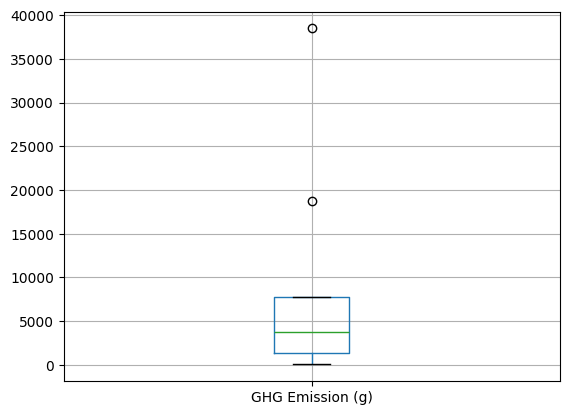

In [72]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [73]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [74]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [75]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

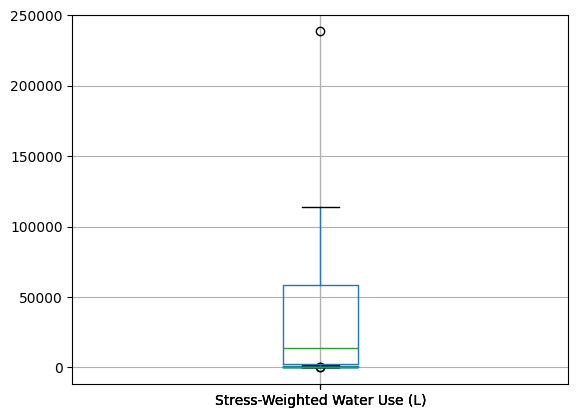

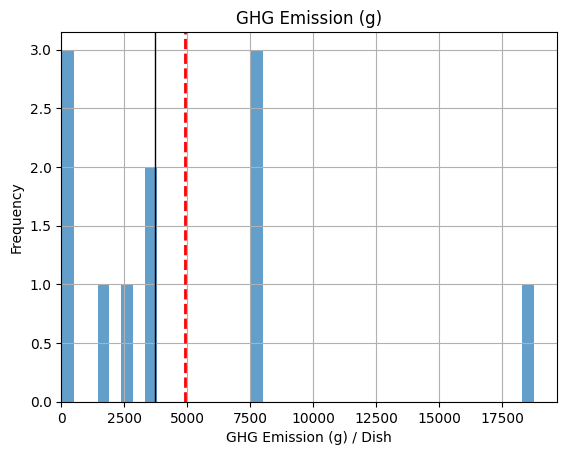

In [76]:
Products_filtered = Products[Products['GHG Emission (g)'] < Products['GHG Emission (g)'].quantile(0.99)]
Products_filtered.hist(column=['GHG Emission (g)'], bins=40, alpha=0.7)
plt.axvline(Products_filtered['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(Products_filtered['GHG Emission (g)'].median(), color='k', linewidth=1, label='median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
# plt.savefig(path + 'filtered_GHGe_dish.png')
plt.show()


In [77]:
# Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('GHG Emission (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'GHGe_100g.png')
# plt.show()

# Using isna() or isnull() to find NaN values in 'GHG Emission (g) / 100g' column
rows_with_nan = Products[Products['GHG Emission (g) / 100g'].isna()]

# Display the rows containing NaN values
print(rows_with_nan)


Empty DataFrame
Columns: [ProdId, Description, SalesGroup, Weight (g), GHG Emission (g), N lost (g), Land Use (m^2), Freshwater Withdrawals (L), Stress-Weighted Water Use (L), GHG Emission (g) / 100g, N lost (g) / 100g, Freshwater Withdrawals (L) / 100g, Stress-Weighted Water Use (L) / 100g, Land Use (m^2) / 100g]
Index: []


In [78]:
# Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_dish.png')
# plt.show()

In [79]:
# Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_100g.png')
# plt.show()

In [80]:
# Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_dish.png')
# plt.show()

In [81]:
# Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_100g.png')
# plt.show()

In [82]:
# Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_dish.png')
# plt.show()

In [83]:
# Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_100g.png')
# plt.show()

In [84]:
# Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2).png')
# plt.show()

In [85]:
# Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
# plt.show()

In [86]:
# Products.to_csv('C:/Users/ENTER_HERE/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv', index = False)